In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
eda = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\bank_market (2).csv")

In [103]:
eda.shape

(45211, 18)

In [104]:
eda.columns

Index(['Cust_num', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [105]:
eda.head(5)

,Cust_num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

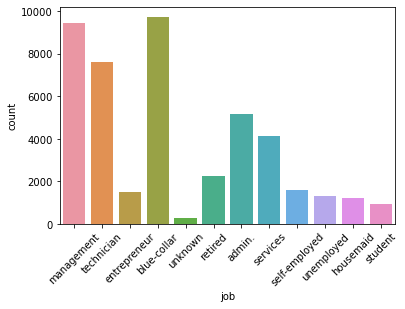

In [106]:
count_job = sns.countplot(eda["job"])
count_job.set_xticklabels(count_job.get_xticklabels(),rotation=45)

In [107]:
pd.DataFrame(pd.value_counts(eda["job"]))

,job
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303
housemaid,1240


In [108]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same lengt

In [109]:
pd.pivot_table(eda, values="balance",columns="job", aggfunc='sum')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
balance,5873423,10499141,2262426,1726570,16680288,4492263,2602146,4141904,1302001,9516246,1982835,510439


In [110]:
pd.pivot_table(eda, values="age",columns="job",index=["default","education"], aggfunc=['count'])

count                                                \
job                admin. blue-collar entrepreneur housemaid management   
default education                                                         
no      primary     209.0      3688.0        178.0     617.0      285.0   
        secondary  4152.0      5254.0        521.0     385.0     1092.0   
        tertiary    570.0       146.0        660.0     172.0     7679.0   
        unknown     166.0       443.0         73.0      44.0      238.0   
yes     primary       NaN        70.0          5.0      10.0        9.0   
        secondary    67.0       117.0         21.0      10.0       29.0   
        tertiary      2.0         3.0         26.0       1.0      122.0   
        unknown       5.0        11.0          3.0       1.0        4.0   

                                                                     \
job               retired self-employed services student technician   
default education                                                     
no      primary     786.0         129.0    336.0    43.0      156.0   
        secondary   969.0         558.0   3396.0   508.0     5126.0   
        tertiary    365.0         820.0    200.0   221.0     1946.0   
        unknown     118.0          39.0    147.0   163.0      239.0   
yes     primary       9.0           1.0      9.0     1.0        2.0   
        secondary    15.0          19.0     61.0     NaN      103.0   
        tertiary      1.0          13.0      2.0     2.0       22.0   
        unknown       1.0           NaN      3.0     NaN        3.0   

                                      
job               unemployed unknown  
default education                     
no      primary        246.0    51.0  
        secondary      713.0    70.0  
        tertiary       285.0    39.0  
        unknown         29.0   126.0  
yes     primary         11.0     NaN  
        secondary       15.0     1.0  
        tertiary         4.0     NaN  
        unknown          NaN     1.0

In [111]:
pd.pivot_table(eda, columns="job",index=["default","loan"], aggfunc='count')

Cust_num                                                        \
job            admin. blue-collar entrepreneur housemaid management retired   
default loan                                                                  
no      no     4134.0      7921.0       1099.0    1075.0     8097.0  1946.0   
        yes     963.0      1610.0        333.0     143.0     1197.0   292.0   
yes     no       46.0       127.0         32.0      13.0      108.0     9.0   
        yes      28.0        74.0         23.0       9.0       56.0    17.0   

                                                        ...            y  \
job          self-employed services student technician  ... entrepreneur   
default loan                                            ...                
no      no          1331.0   3267.0   924.0     6206.0  ...       1099.0   
        yes          215.0    812.0    11.0     1261.0  ...        333.0   
yes     no            19.0     51.0     2.0       82.0  ...         32.0   
        yes           14.0     24.0     1.0       48.0  ...         23.0   

                                                                          \
job          housemaid management retired self-employed services student   
default loan                                                               
no      no      1075.0     8097.0  1946.0        1331.0   3267.0   924.0   
        yes      143.0     1197.0   292.0         215.0    812.0    11.0   
yes     no        13.0      108.0     9.0          19.0     51.0     2.0   
        yes        9.0       56.0    17.0          14.0     24.0     1.0   

                                            
job          technician unemployed unknown  
default loan                                
no      no       6206.0     1171.0   282.0  
        yes      1261.0      102.0     4.0  
yes     no         82.0       23.0     2.0  
        yes        48.0        7.0     NaN  

[4 rows x 180 columns]

In [112]:
pd.pivot_table(eda,values="Cust_num", columns="job",index=["default","loan"], aggfunc='count')

job           admin.  blue-collar  entrepreneur  housemaid  management  \
default loan                                                             
no      no    4134.0       7921.0        1099.0     1075.0      8097.0   
        yes    963.0       1610.0         333.0      143.0      1197.0   
yes     no      46.0        127.0          32.0       13.0       108.0   
        yes     28.0         74.0          23.0        9.0        56.0   

job           retired  self-employed  services  student  technician  \
default loan                                                          
no      no     1946.0         1331.0    3267.0    924.0      6206.0   
        yes     292.0          215.0     812.0     11.0      1261.0   
yes     no        9.0           19.0      51.0      2.0        82.0   
        yes      17.0           14.0      24.0      1.0        48.0   

job           unemployed  unknown  
default loan                       
no      no        1171.0    282.0  
        yes        102.0      4.0  
yes     no          23.0      2.0  
        yes          7.0      NaN

In [113]:
pd.pivot_table(eda,values="Cust_num", columns="marital",index=["default","loan"], aggfunc='count')

marital       divorced  married  single
default loan                           
no      no        4210    22270   10973
        yes        869     4496    1578
yes     no          76      284     154
        yes         52      164      85

In [114]:
data = pd.pivot_table(eda,values="balance", columns="marital",index=["default","loan"], aggfunc='count')

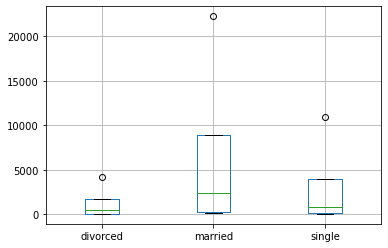

In [115]:
data.boxplot()

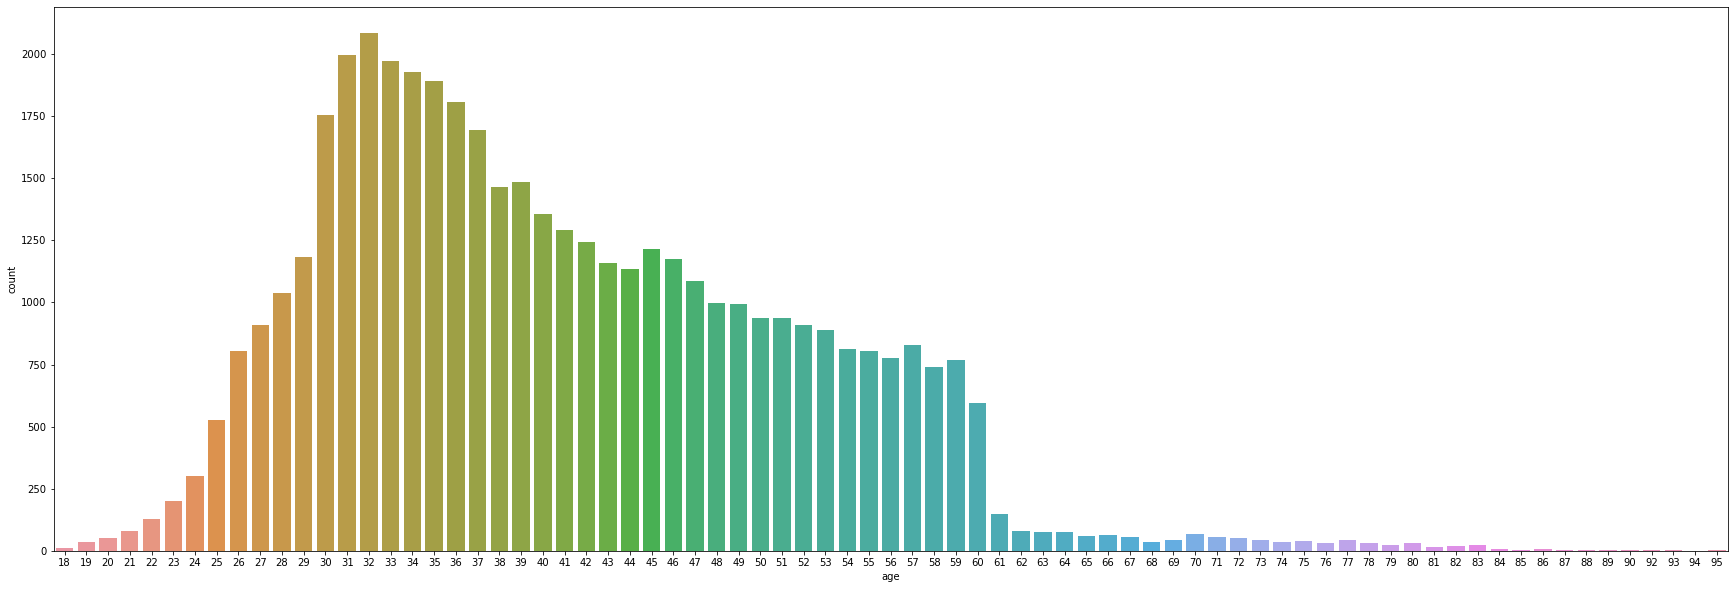

In [122]:
plt.figure(figsize= (30,10))
sns.countplot(eda["age"])

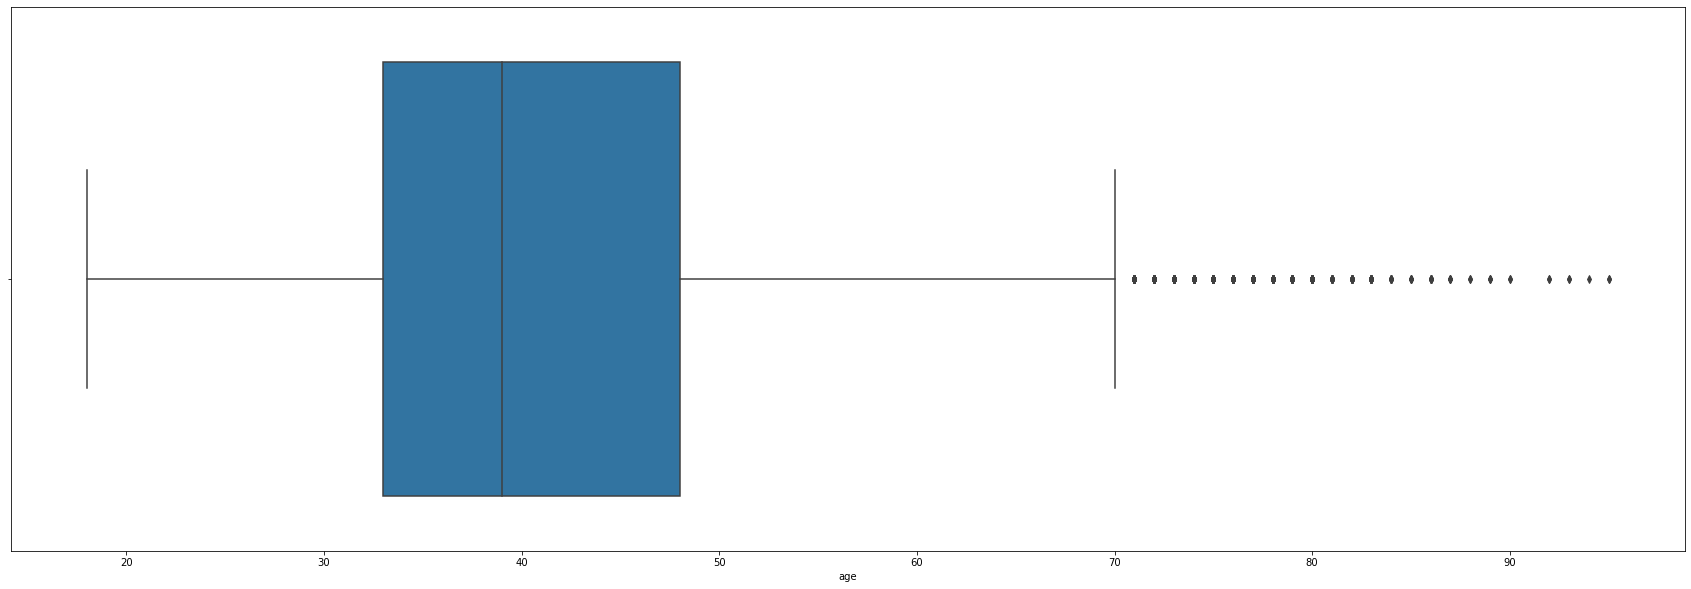

In [125]:
plt.figure(figsize= (30,10))
sns.boxplot(eda["age"])

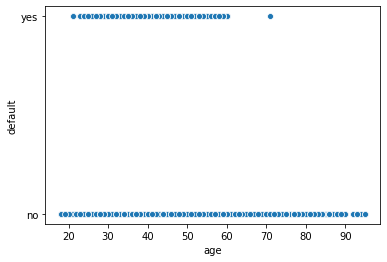

In [129]:
sns.scatterplot(eda["age"], eda["default"])

In [143]:
pd.pivot_table(eda,index="default",values="default",aggfunc="counts")

ValueError: Grouper for 'default' not 1-dimensional

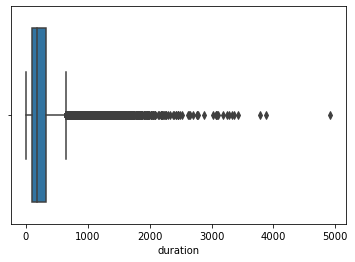

In [147]:
sns.boxplot(eda["duration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9d9b71608>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9d9c2b788>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9d9494e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9d9deb448>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9d9deb7c8>],
 'means': []}

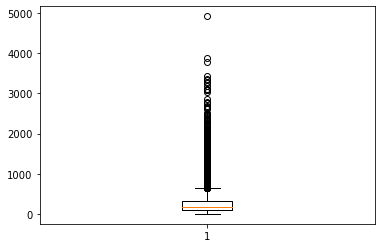

In [149]:
plt.boxplot(eda["duration"])

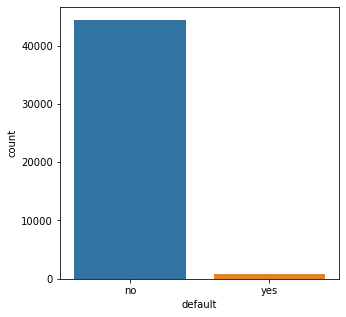

In [157]:
plt.figure(figsize=(5,5))
sns.countplot(eda["default"])